# The Office Text Generator

## Introduction
This notebook is for a school project on software development at KEA - Copenhagen school of design nd tecnology.

### Research question

Is it possible with AI to generate lines for characters from the tv-series ‘The Office’ and successfully imitate the personality of the characters? 
* How can we scientifically justify what is a successful imitation of a character?
* Which parameters can we use to measure the performance of the text generator?


### Approach / Methods
* Data Cleaning
* Data Analysis (EDA)
    - Word count
    - Get top word
    - Bleeped words (som are stored as an actions and some as line)
* PCA
    - Show 2 dimensional data with bleeped words and word count
* Text Generation

### Characthers list
* Characther that in atleast 50% of the entiere tv-show (16 characthers)
>['Dwight', 'Pam', 'Jim', 'Stanley', 'Angela', 'Phyllis', 'Meredith', 'Creed', 'Oscar', 'Ryan', 'Kelly', 'Andy', 'Toby', 'Michael', 'Darryl', 'Erin' ]
* Top 5 Characthers
> ['Dwight', 'Pam', 'Jim', 'Stanley', 'Michael']

## Data Extraction

In [3]:
import pandas as pd
import os
import re
import pickle

### Getting Data
Extract the data from excel file - the-office-lines.xlsx

In [4]:
directory = os.getcwd()
data = pd.read_excel(directory + '/the-office-lines.xlsx')
df =  pd.DataFrame(data, columns=['speaker', 'line_text'])

df.head()

speaker                                          line_text
0  Michael  All right Jim. Your quarterlies look very good...
1      Jim         Oh, I told you. I couldn't close it. So...
2  Michael  So you've come to the master for guidance? Is ...
3      Jim         Actually, you called me in here, but yeah.
4  Michael    All right. Well, let me show you how it's done.

#### Getting Transcripts
Creating a transcript file for each character in the choosen characther list
* mkdir Transcripts

In [5]:
mkdir Transcripts

mkdir: Transcripts: File exists


In [6]:
top16Char = ['Dwight', 'Pam', 'Jim', 'Stanley', 'Angela', 'Phyllis', 'Meredith', 'Creed', 'Oscar', 'Ryan', 'Kelly', 'Andy', 'Toby', 'Michael', 'Darryl', 'Erin' ]
top5Char = ['Dwight', 'Pam', 'Jim', 'Stanley', 'Michael']

In [7]:
for index, row in df.iterrows():
    if row['speaker'] in top5Char:
        speaker = row['speaker']
        with open('Transcripts/%s_transcript' %speaker + '.txt', 'a') as f:
            f.write(str(row['line_text']))
print('Transcripts extracted from excel file')

Transcripts extracted from excel file


#### Storing Actions
Extract actions from characters transcript files in the directory Transcripts,
and pickle them to at new actions file

We store the actions so that we later can extract all the bleeped actions
* mkdir Actions

In [8]:
mkdir Actions

mkdir: Actions: File exists


In [9]:
for character in top5Char:
    all_lines = open('Transcripts/%s_transcript' %character + '.txt', 'r')
    for line in all_lines:
        res = re.findall(r'\[.*?\]', line)
        if not len(res) == 0:
            with open('Actions/%s_actions' %character + '.txt', 'wb') as f:
                pickle.dump(str(res), f)

#### Storing Lines
Extract Lines from characters transcript files in the directory Transcripts,
and pickle them to at new lines file
* mkdir Lines

In [10]:
mkdir Lines

mkdir: Lines: File exists


In [11]:
for character in top5Char:
    all_lines = open('Transcripts/%s_transcript' %character + '.txt', 'r')
    for line in all_lines:
        res = re.sub(r'\[.*?\]', '', line)
        if not len(res) == 0:
            with open('Lines/%s_lines' %character + '.txt', 'wb') as f:
                pickle.dump(str(res), f)

#### Loading the pickeled actions and line
Actions

In [12]:
actions = {}
for i, char in enumerate(top5Char):
    with open('Actions/%s_actions' %char + ".txt", "rb") as file:
        actions[char] = pickle.load(file)

In [13]:
actions.keys()

dict_keys(['Dwight', 'Pam', 'Jim', 'Stanley', 'Michael'])

Lines

In [14]:
lines = {}
for i, char in enumerate(top5Char):
    with open('Lines/%s_lines' %char + ".txt", "rb") as file:
        lines[char] = pickle.load(file)

In [15]:
lines.keys()

dict_keys(['Dwight', 'Pam', 'Jim', 'Stanley', 'Michael'])

## Data Cleaning

In [16]:
import pandas as pd
import string

##### Combine fuction

In [17]:
# combine
def combine_text(list_of_text):
    combined_text = "".join(list_of_text)
    return combined_text

#### Cleaning actions fuction

In [18]:
# cleaing technique actions
def clean_actions(text):
    text = text.lower()
    text = re.sub("[']", '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[,]", '', text)
    text = re.sub('["]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    
    return text

actions_clening = lambda x: clean_actions(x)

#### Cleaning round 1 fuction for lines

In [19]:
# cleaing technique round 1
def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub("[']", '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    
    
    return text

round1 = lambda x: clean_text_round1(x)

#### Cleaning round 2 fuction

In [20]:
# cleaing technique round 2
def clean_text_round2(text):
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
   
    return text

round2 = lambda x: clean_text_round2(x)

#### Actions cleaning
* combine
* pandas dataframe
* cleaning techniques round 1

In [21]:
# combine
actions_combined = {key: [combine_text(value)] for (key, value) in actions.items()}
#actions_combined

In [22]:
# padas dataframe
pd.set_option('max_colwidth',150)

actions_df = pd.DataFrame.from_dict(actions_combined).transpose()
actions_df.columns = ['actions']
actions_df = actions_df.sort_index()
actions_df

actions
Dwight   ['[singing]', '[Imitates heavy drumming]', '[Imitates heavy drumming]', '[points to Ryan]', '[new take]', '[does a martial arts move with his hand...
Jim      ['[crosses fingers]', '[Dwight begins smashing pencils with his phone]', '[scratches head]', '[Car horn honking]', '[looks at camera]', '[Shedder ...
Michael  ['[on the phone]', '[quick cut scene]', '[hangs up]', '[Clears throat]', '[growls]', "[shows the camera his WORLD'S BEST BOSS mug]", '[Strains, gr...
Pam      ['[Laughs]', '[Laughing]', '[stirs]', '[nods toward camera]', '[laughs]', '[on phone]', '[Dwight laughs]', '[whispering]', '[on her cell phone]', ...
Stanley  ['[looks at keys, continues talking on phone]', '[in pain]', '[starts chuckling]', '[laughs, and imitates Donald Trump]', '[laughs]', "[after Ryan...

In [23]:
# cleaing technique round 1
actions_clean = pd.DataFrame(actions_df.actions.apply(actions_clening))
actions_clean

actions
Dwight     singing   imitates heavy drumming   imitates heavy drumming   points to ryan   new take   does a martial arts move with his hands   talking over...
Jim        crosses fingers   dwight begins smashing pencils with his phone   scratches head   car horn honking   looks at camera   shedder whirring   power...
Michael    on the phone   quick cut scene   hangs up   clears throat   growls   shows the camera his worlds best boss mug   strains grunts   walking out of...
Pam        laughs   laughing   stirs   nods toward camera   laughs   on phone   dwight laughs   whispering   on her cell phone   gives meredith her card   ...
Stanley    looks at keys continues talking on phone   in pain   starts chuckling   laughs and imitates donald trump   laughs   after ryan opens a new gift ...

In [24]:
# cleaing technique round 2
actions_clean = pd.DataFrame(actions_clean.actions.apply(round2))
#actions_clean

#### Lines cleaning
* combine
* pandas dataframe
* cleaning techniques round 1 and 2

In [25]:
# combine
lines_combined = {key: [combine_text(value)] for (key, value) in lines.items()}
#lines_combined

In [26]:
# pandas dataframe
pd.set_option('max_colwidth',150)

lines_df = pd.DataFrame.from_dict(lines_combined).transpose()
lines_df.columns = ['lines']
lines_df = lines_df.sort_index()
lines_df

lines
Dwight    Shall I play for you? Pa rum pump um pum  I have no gifts for you. Pa rum pump um pum Whassup!Whassup.What?Just clearing my desk. I can't concent...
Jim      Oh, I told you. I couldn't close it. So...Actually, you called me in here, but yeah.My job is to speak to clients on the phone about... uh, quanti...
Michael  All right Jim. Your quarterlies look very good. How are things at the library?So you've come to the master for guidance? Is this what you're sayin...
Pam      Well. I don't know.What?Uh, yeah. Just a fax.You haven't told me.Uh, yeah, the one...You put in the garbage can that was a special filing cabinet....
Stanley  Well...It could be out of your hands Michael.Can you promise that?It's just that we need to know.You can't say for sure whether it'll be us or the...

In [27]:
# cleaing technique round 1
lines_clean = pd.DataFrame(lines_df.lines.apply(round1))
lines_clean

lines
Dwight    shall i play for you  pa rum pump um pum  i have no gifts for you  pa rum pump um pum whassup whassup what just clearing my desk  i cant concentr...
Jim      oh  i told you  i couldnt close it  so   actually  you called me in here  but yeah my job is to speak to clients on the phone about    uh  quantit...
Michael  all right jim  your quarterlies look very good  how are things at the library so youve come to the master for guidance  is this what youre saying ...
Pam      well  i dont know what uh  yeah  just a fax you havent told me uh  yeah  the one   you put in the garbage can that was a special filing cabinet i ...
Stanley  well   it could be out of your hands michael can you promise that its just that we need to know you cant say for sure whether itll be us or them  ...

In [28]:
# cleaing technique round 2
lines_clean = pd.DataFrame(lines_clean.lines.apply(round2))
lines_clean

lines
Dwight    shall i play for you  pa rum pump um pum  i have no gifts for you  pa rum pump um pum whassup whassup what just clearing my desk  i cant concentr...
Jim      oh  i told you  i couldnt close it  so   actually  you called me in here  but yeah my job is to speak to clients on the phone about    uh  quantit...
Michael  all right jim  your quarterlies look very good  how are things at the library so youve come to the master for guidance  is this what youre saying ...
Pam      well  i dont know what uh  yeah  just a fax you havent told me uh  yeah  the one   you put in the garbage can that was a special filing cabinet i ...
Stanley  well   it could be out of your hands michael can you promise that its just that we need to know you cant say for sure whether itll be us or them  ...

## Organize Lines Data 


#### Corpus Lines

* mkdir pickle

In [29]:
mkdir pickle

mkdir: pickle: File exists


In [30]:
char_names = ['Dwight Schrute', 'Jim Halpert', 'Michael Scott', 'Pam Beesly', 'Stanley Hudson']
lines_df['Characters'] = char_names
lines_df

lines  \
Dwight    Shall I play for you? Pa rum pump um pum  I have no gifts for you. Pa rum pump um pum Whassup!Whassup.What?Just clearing my desk. I can't concent...   
Jim      Oh, I told you. I couldn't close it. So...Actually, you called me in here, but yeah.My job is to speak to clients on the phone about... uh, quanti...   
Michael  All right Jim. Your quarterlies look very good. How are things at the library?So you've come to the master for guidance? Is this what you're sayin...   
Pam      Well. I don't know.What?Uh, yeah. Just a fax.You haven't told me.Uh, yeah, the one...You put in the garbage can that was a special filing cabinet....   
Stanley  Well...It could be out of your hands Michael.Can you promise that?It's just that we need to know.You can't say for sure whether it'll be us or the...   

             Characters  
Dwight   Dwight Schrute  
Jim         Jim Halpert  
Michael   Michael Scott  
Pam          Pam Beesly  
Stanley  Stanley Hudson

In [31]:
# Let's pickle it for later use
lines_df.to_pickle("pickle/lines_corpus.pkl")

#### Document-Term Matrix

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
lines_cv = cv.fit_transform(lines_clean.lines)
lines_dtm = pd.DataFrame(lines_cv.toarray(), columns=cv.get_feature_names())
lines_dtm.index = lines_clean.index
lines_dtm

aa  aaaaaaaa  aaaaaand  aaaaah  aaaaeeexcellent  aaaagh  aaaah  \
Dwight    4        24         0       4                0       4      8   
Jim       0         0         0       0                0       0      0   
Michael   0         8         4       0                4       0      4   
Pam       0         0         0       0                0       0      0   
Stanley   0         0         0       0                0       0      0   

         aaaahh  aaaahhh  aaaall  ...  zombie  zombies  zone  zoning  zoo  \
Dwight        0        0       0  ...      12        4    12       4   12   
Jim           0        0       0  ...       8        4     4       0    0   
Michael       8        4       4  ...       0        4    44       4    4   
Pam           0        0       0  ...       0        0     0       0    0   
Stanley       0        0       0  ...       0        0     0       0    0   

         zoom  zooms  zoppity  zoran  zuckerberg  
Dwight      0      0        0      4           4  
Jim         0      0        0      0           0  
Michael    20      4        8      0           0  
Pam         0      0        0      0           0  
Stanley     0      0        0      0           0  

[5 rows x 14956 columns]

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
actions_cv = cv.fit_transform(actions_clean.actions)
actions_dtm = pd.DataFrame(actions_cv.toarray(), columns=cv.get_feature_names())
actions_dtm.index = actions_clean.index
actions_dtm

aback  abby  abruptly  absolutely  accent  accepts  accidentally  \
Dwight       0     8         4           0      36        0             4   
Jim          0    12         4           0      12        0             0   
Michael      4     4         0           4      80        4             4   
Pam          0     0         0           0      12        4             0   
Stanley      0     0         0           0       0        0             0   

         account  accountants  acting  ...  youre  youtube  yuck  zeke  \
Dwight         4            4       4  ...     12        0     0     4   
Jim            0            0       0  ...      0        0     0     0   
Michael        0            0       4  ...      0        8     4     0   
Pam            0            0       0  ...      0        0     0     0   
Stanley        0            0       0  ...      0        0     0     0   

         zipper  zipping  zips  zone  zooms  zwarte  
Dwight        4        0     0     0      4       4  
Jim           0        0     0     0      0       0  
Michael       4        4     8     4     12       0  
Pam           0        0     0     0      0       0  
Stanley       0        0     0     0      0       0  

[5 rows x 3400 columns]

## Exploratory Data Analysis

### Most Common Words

In [34]:
lines_dtm.to_pickle("pickle/lines_dtm.pkl")
actions_dtm.to_pickle("pickle/actions_dtm.pkl")

In [93]:
lines_clean.to_pickle("pickle/lines_clean.pkl")

In [36]:
lines = pd.read_pickle('pickle/lines_dtm.pkl')
lines = lines.transpose()
lines.head()

Dwight  Jim  Michael  Pam  Stanley
aa                    4    0        0    0        0
aaaaaaaa             24    0        8    0        0
aaaaaand              0    0        4    0        0
aaaaah                4    0        0    0        0
aaaaeeexcellent       0    0        4    0        0

In [37]:
actions = pd.read_pickle('pickle/actions_dtm.pkl')
actions = actions.transpose()

In [38]:
top_dict = {}
for c in lines.columns:
    top = lines[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'Dwight': [('oh', 1912),
  ('im', 1776),
  ('know', 1680),
  ('just', 1588),
  ('dont', 1416),
  ('okay', 1404),
  ('like', 1336),
  ('jim', 1304),
  ('michael', 1220),
  ('right', 1092),
  ('youre', 1020),
  ('good', 1004),
  ('yeah', 988),
  ('thats', 972),
  ('yes', 948),
  ('come', 936),
  ('hey', 916),
  ('going', 828),
  ('got', 824),
  ('want', 752),
  ('ok', 728),
  ('did', 720),
  ('need', 712),
  ('really', 712),
  ('gonna', 660),
  ('think', 640),
  ('time', 620),
  ('say', 612),
  ('uh', 568),
  ('let', 564)],
 'Jim': [('just', 2544),
  ('oh', 2200),
  ('know', 2192),
  ('im', 1868),
  ('right', 1688),
  ('yeah', 1632),
  ('okay', 1536),
  ('dont', 1424),
  ('hey', 1328),
  ('really', 1324),
  ('think', 1312),
  ('thats', 1248),
  ('dwight', 1168),
  ('like', 1028),
  ('uh', 1024),
  ('good', 1020),
  ('gonna', 876),
  ('ok', 828),
  ('going', 820),
  ('michael', 792),
  ('pam', 792),
  ('youre', 780),
  ('did', 712),
  ('great', 628),
  ('want', 596),
  ('mean', 564),
  (

In [39]:
for character, top_words in top_dict.items():
    print(character)
    print(', '.join([word for word, count in top_words[0:30]]))
    print('---')

Dwight
oh, im, know, just, dont, okay, like, jim, michael, right, youre, good, yeah, thats, yes, come, hey, going, got, want, ok, did, need, really, gonna, think, time, say, uh, let
---
Jim
just, oh, know, im, right, yeah, okay, dont, hey, really, think, thats, dwight, like, uh, good, gonna, ok, going, michael, pam, youre, did, great, want, mean, got, um, alright, time
---
Michael
know, just, dont, im, oh, okay, like, right, going, good, thats, yeah, think, want, yes, hey, youre, ok, come, did, dwight, really, people, pam, say, gonna, uh, time, need, um
---
Pam
oh, just, yeah, im, dont, know, like, michael, okay, hey, really, think, jim, um, thats, good, going, did, want, dwight, right, youre, great, gonna, ok, yes, mean, uh, thank, come
---
Stanley
im, dont, know, like, just, oh, michael, want, did, work, got, think, going, thats, need, youre, little, day, say, good, way, years, ill, gonna, yes, christmas, mind, right, said, time
---


In [40]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for character in lines.columns:
    top = [word for (word, count) in top_dict[character]]
    for t in top:
        words.append(t)
        
words

['oh',
 'im',
 'know',
 'just',
 'dont',
 'okay',
 'like',
 'jim',
 'michael',
 'right',
 'youre',
 'good',
 'yeah',
 'thats',
 'yes',
 'come',
 'hey',
 'going',
 'got',
 'want',
 'ok',
 'did',
 'need',
 'really',
 'gonna',
 'think',
 'time',
 'say',
 'uh',
 'let',
 'just',
 'oh',
 'know',
 'im',
 'right',
 'yeah',
 'okay',
 'dont',
 'hey',
 'really',
 'think',
 'thats',
 'dwight',
 'like',
 'uh',
 'good',
 'gonna',
 'ok',
 'going',
 'michael',
 'pam',
 'youre',
 'did',
 'great',
 'want',
 'mean',
 'got',
 'um',
 'alright',
 'time',
 'know',
 'just',
 'dont',
 'im',
 'oh',
 'okay',
 'like',
 'right',
 'going',
 'good',
 'thats',
 'yeah',
 'think',
 'want',
 'yes',
 'hey',
 'youre',
 'ok',
 'come',
 'did',
 'dwight',
 'really',
 'people',
 'pam',
 'say',
 'gonna',
 'uh',
 'time',
 'need',
 'um',
 'oh',
 'just',
 'yeah',
 'im',
 'dont',
 'know',
 'like',
 'michael',
 'okay',
 'hey',
 'really',
 'think',
 'jim',
 'um',
 'thats',
 'good',
 'going',
 'did',
 'want',
 'dwight',
 'right',
 'y

In [41]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('oh', 5),
 ('im', 5),
 ('know', 5),
 ('just', 5),
 ('dont', 5),
 ('like', 5),
 ('right', 5),
 ('youre', 5),
 ('good', 5),
 ('thats', 5),
 ('going', 5),
 ('want', 5),
 ('did', 5),
 ('gonna', 5),
 ('think', 5),
 ('okay', 4),
 ('michael', 4),
 ('yeah', 4),
 ('yes', 4),
 ('hey', 4),
 ('ok', 4),
 ('really', 4),
 ('time', 4),
 ('uh', 4),
 ('come', 3),
 ('got', 3),
 ('need', 3),
 ('say', 3),
 ('dwight', 3),
 ('um', 3),
 ('jim', 2),
 ('pam', 2),
 ('great', 2),
 ('mean', 2),
 ('let', 1),
 ('alright', 1),
 ('people', 1),
 ('thank', 1),
 ('work', 1),
 ('little', 1),
 ('day', 1),
 ('way', 1),
 ('years', 1),
 ('ill', 1),
 ('christmas', 1),
 ('mind', 1),
 ('said', 1)]

In [42]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 2]
add_stop_words

['oh',
 'im',
 'know',
 'just',
 'dont',
 'like',
 'right',
 'youre',
 'good',
 'thats',
 'going',
 'want',
 'did',
 'gonna',
 'think',
 'okay',
 'michael',
 'yeah',
 'yes',
 'hey',
 'ok',
 'really',
 'time',
 'uh',
 'come',
 'got',
 'need',
 'say',
 'dwight',
 'um']

In [94]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
lines_clean = pd.read_pickle('pickle/lines_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
lines_cv = cv.fit_transform(lines_clean.lines)
lines_stop = pd.DataFrame(lines_cv.toarray(), columns=cv.get_feature_names())
lines_stop.index = lines_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("pickle/cv_stop.pkl", "wb"))
lines_stop.to_pickle("pickle/dtm_stop.pkl")

In [44]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2", max_font_size=150, random_state=42)

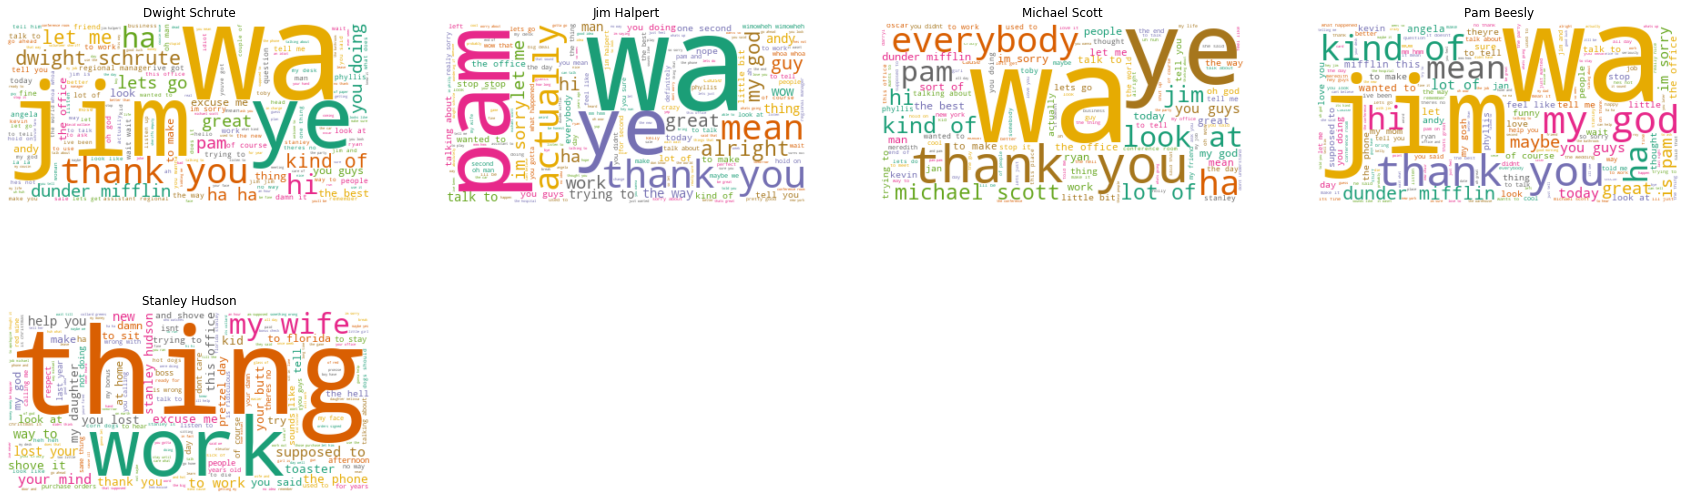

In [45]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [30, 15]

full_names = ['Dwight Schrute', 'Jim Halpert', 'Michael Scott', 'Pam Beesly', 'Stanley Hudson']

# Create subplots for each comedian
for index, character in enumerate(lines.columns):
    wc.generate(lines_clean.lines[character])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

### Number of Words

In [46]:
# Find the number of unique words that each comedian uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for character in lines.columns:
    uniques = lines[character].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
lines_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['character', 'unique_words'])
lines_unique_sort = lines_words.sort_values(by='unique_words')
lines_unique_sort

character  unique_words
4  Stanley Hudson          1253
3      Pam Beesly          3964
1     Jim Halpert          4737
0  Dwight Schrute          8099
2   Michael Scott          9394

Text(0.5, 1.0, 'Number of Unique Words')

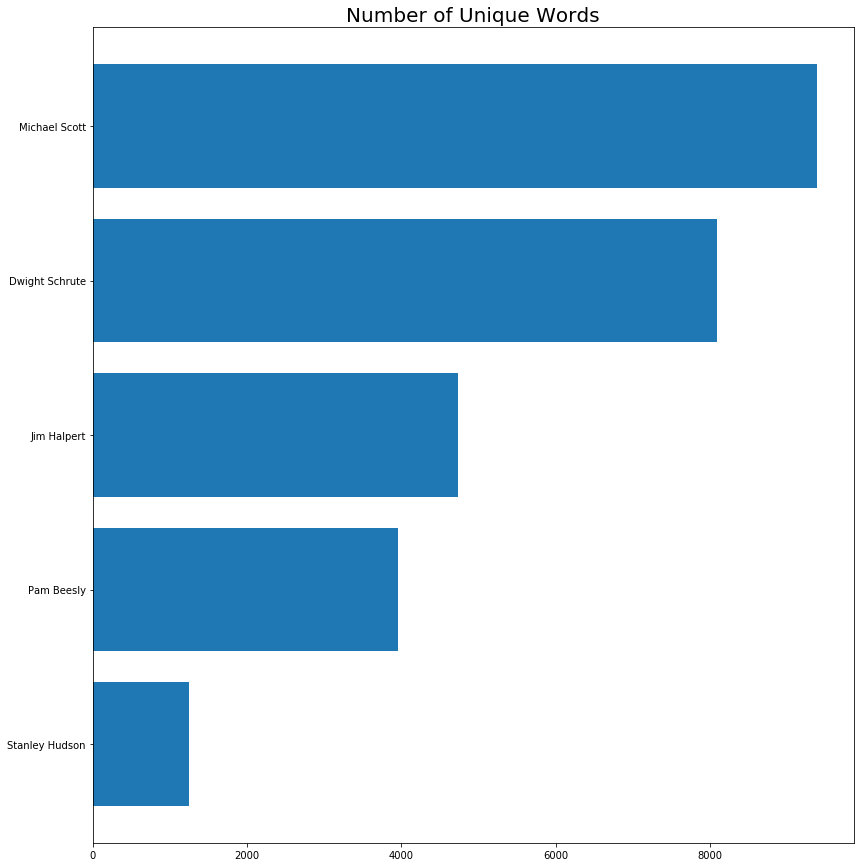

In [47]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(lines_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, lines_unique_sort.unique_words, align='center')
plt.yticks(y_pos, lines_unique_sort.character)
plt.title('Number of Unique Words', fontsize=20)

We can't really conclude anything from this, as Michael Scott probably also has the most lines in the show...

### Amount of Profanity 

In [48]:
lines_bad_words = lines.transpose()[['bleep', 'bitch']]

lines_profanity = pd.concat([lines_bad_words.bleep, lines_bad_words.bitch], axis=1)
lines_profanity.columns = ['bleep', 'bitch']

lines_profanity

bleep  bitch
Dwight       8      8
Jim          4      4
Michael      8     72
Pam          0      0
Stanley      0      4

In [49]:
# Let's isolate bad words in the actions
actions_bad_words = actions.transpose()[['bleep']]

actions_profanity = pd.concat([actions_bad_words.bleep], axis=1)
actions_profanity.columns = ['bleep']
actions_profanity

bleep
Dwight       8
Jim          4
Michael     28
Pam          0
Stanley      0

In [50]:
# Profanity overall
lines_bad_words = lines.transpose()[['bleep', 'bitch']]
actions_bad_words = actions.transpose()[['bleep']]

profanity = pd.concat([lines_bad_words.bleep + actions_bad_words.bleep, lines_bad_words.bitch], axis=1)
profanity.columns = ['bleep', 'bitch']

profanity

bleep  bitch
Dwight      16      8
Jim          8      4
Michael     36     72
Pam          0      0
Stanley      0      4

In [51]:
prof = profanity['bleep'] + profanity['bitch']
names = []
count = []
for key, value in prof.items():
    names.append(key)
    count.append(value)

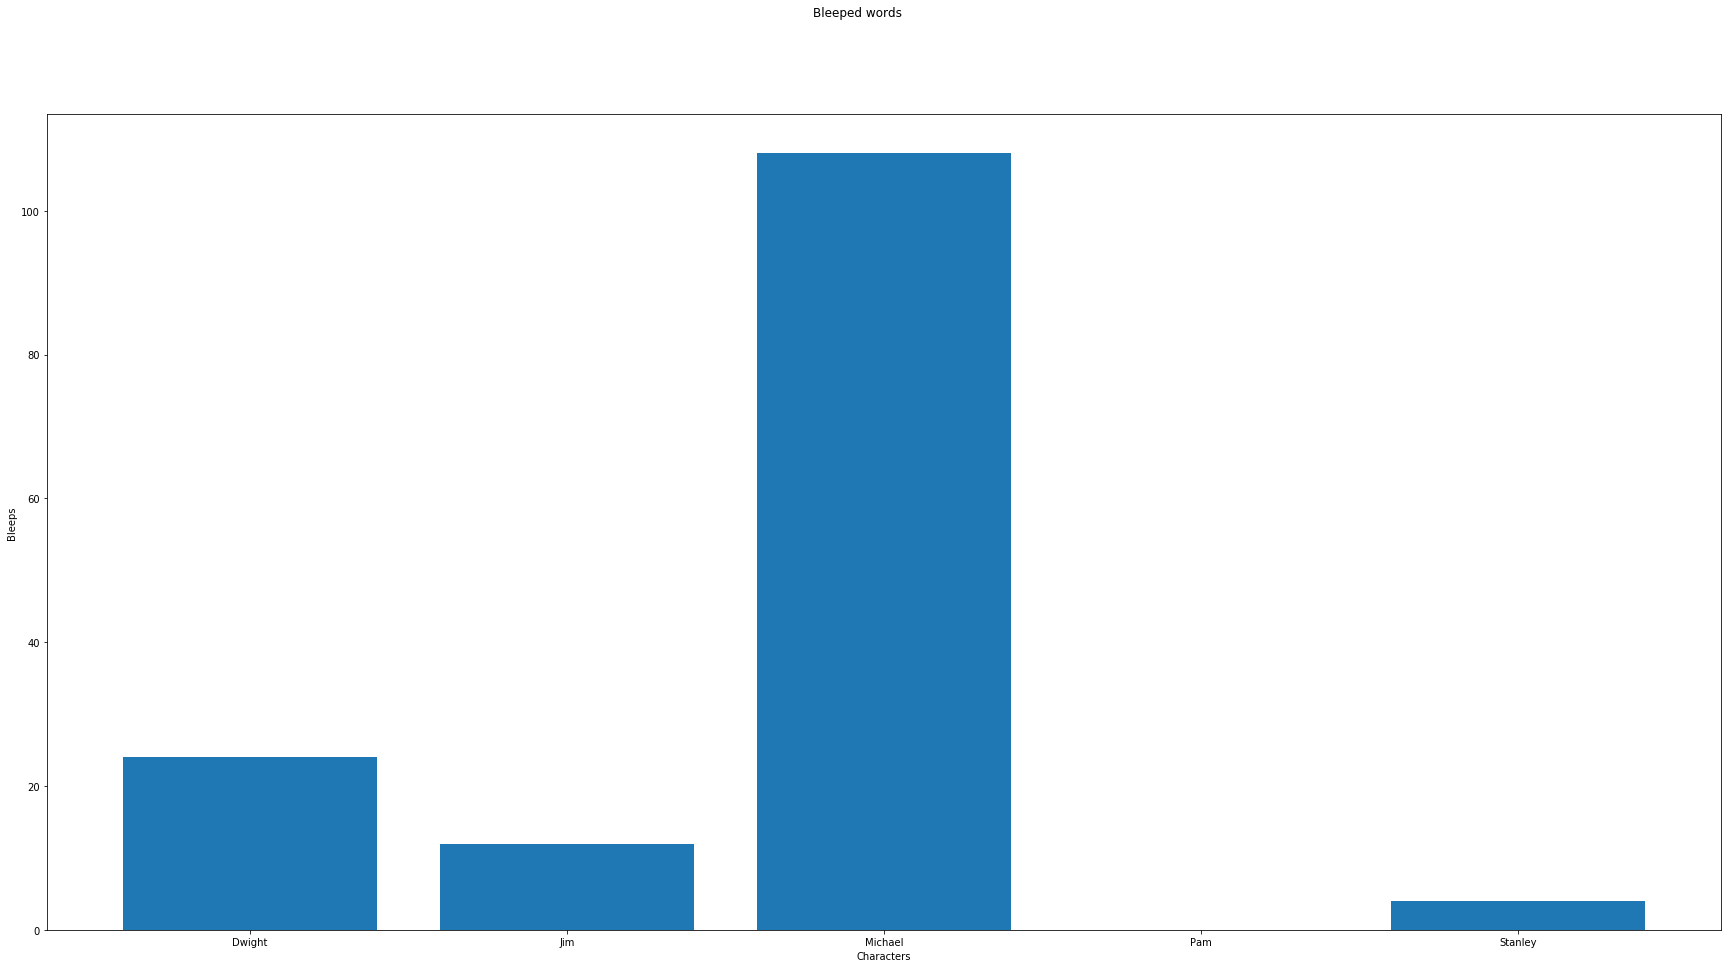

In [52]:
plt.bar(names, count)
plt.suptitle('Bleeped words')
plt.xlabel('Characters')
plt.ylabel('Bleeps')
plt.show()

#### Number of words spoken by each character

In [53]:
print(lines_clean.lines.apply(lambda x : len(x.split())))

Dwight     334460
Jim        249344
Michael    670224
Pam        189420
Stanley     25824
Name: lines, dtype: int64


## Sentiment Analysis

### Sentiment of Routine

In [54]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

lines = pd.read_pickle('pickle/lines_corpus.pkl')
lines

lines  \
Dwight    Shall I play for you? Pa rum pump um pum  I have no gifts for you. Pa rum pump um pum Whassup!Whassup.What?Just clearing my desk. I can't concent...   
Jim      Oh, I told you. I couldn't close it. So...Actually, you called me in here, but yeah.My job is to speak to clients on the phone about... uh, quanti...   
Michael  All right Jim. Your quarterlies look very good. How are things at the library?So you've come to the master for guidance? Is this what you're sayin...   
Pam      Well. I don't know.What?Uh, yeah. Just a fax.You haven't told me.Uh, yeah, the one...You put in the garbage can that was a special filing cabinet....   
Stanley  Well...It could be out of your hands Michael.Can you promise that?It's just that we need to know.You can't say for sure whether it'll be us or the...   

             Characters  
Dwight   Dwight Schrute  
Jim         Jim Halpert  
Michael   Michael Scott  
Pam          Pam Beesly  
Stanley  Stanley Hudson

In [57]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

lines['polarity'] = lines['lines'].apply(pol)
lines['subjectivity'] = lines['lines'].apply(sub)
lines

lines  \
Dwight    Shall I play for you? Pa rum pump um pum  I have no gifts for you. Pa rum pump um pum Whassup!Whassup.What?Just clearing my desk. I can't concent...   
Jim      Oh, I told you. I couldn't close it. So...Actually, you called me in here, but yeah.My job is to speak to clients on the phone about... uh, quanti...   
Michael  All right Jim. Your quarterlies look very good. How are things at the library?So you've come to the master for guidance? Is this what you're sayin...   
Pam      Well. I don't know.What?Uh, yeah. Just a fax.You haven't told me.Uh, yeah, the one...You put in the garbage can that was a special filing cabinet....   
Stanley  Well...It could be out of your hands Michael.Can you promise that?It's just that we need to know.You can't say for sure whether it'll be us or the...   

             Characters  polarity  subjectivity  
Dwight   Dwight Schrute  0.142359      0.504612  
Jim         Jim Halpert  0.142730      0.528489  
Michael   Michael Scott  0.167168      0.521001  
Pam          Pam Beesly  0.149605      0.525879  
Stanley  Stanley Hudson  0.097189      0.488987

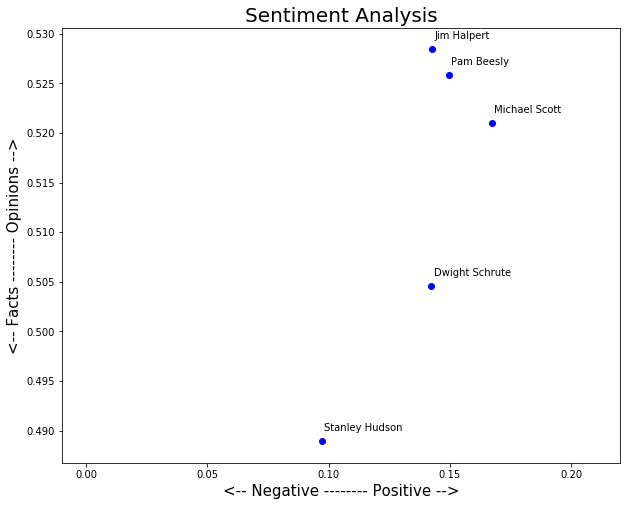

In [60]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, character in enumerate(lines.index):
    x = lines.polarity.loc[character]
    y = lines.subjectivity.loc[character]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, lines['Characters'][index], fontsize=10)
    plt.xlim(-.01, .22) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

### Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [61]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [62]:
lines

lines  \
Dwight    Shall I play for you? Pa rum pump um pum  I have no gifts for you. Pa rum pump um pum Whassup!Whassup.What?Just clearing my desk. I can't concent...   
Jim      Oh, I told you. I couldn't close it. So...Actually, you called me in here, but yeah.My job is to speak to clients on the phone about... uh, quanti...   
Michael  All right Jim. Your quarterlies look very good. How are things at the library?So you've come to the master for guidance? Is this what you're sayin...   
Pam      Well. I don't know.What?Uh, yeah. Just a fax.You haven't told me.Uh, yeah, the one...You put in the garbage can that was a special filing cabinet....   
Stanley  Well...It could be out of your hands Michael.Can you promise that?It's just that we need to know.You can't say for sure whether it'll be us or the...   

             Characters  polarity  subjectivity  
Dwight   Dwight Schrute  0.142359      0.504612  
Jim         Jim Halpert  0.142730      0.528489  
Michael   Michael Scott  0.167168      0.521001  
Pam          Pam Beesly  0.149605      0.525879  
Stanley  Stanley Hudson  0.097189      0.488987

In [63]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in lines.lines:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[[" Shall I play for you? Pa rum pump um pum  I have no gifts for you. Pa rum pump um pum Whassup!Whassup.What?Just clearing my desk. I can't concentrate.It's overlapping. It's all spilling over the edge. One word, two syllables. Demarcation.You can't do that.Safety violation. I could fall and pierce an organ.Downsizing?Downsizing? I have no problem with that. I have been recommending downsizing since I first got here. I even brought it up in my interview. I say, bring it on.I'm Assistant Regional Manager. I should know first.OK, um, can you just tell me please? Just tell me quietly. Can you whisper it in my ear?Please, OK? Do you want me to tell 'em?OK. You tell 'em. With my permission. Permission granted.Go ahead.On his mother's grave.Pam, information is power.Dwight Schrute, Assistant Regional Manager.Uh... yeah I got a '78 280Z. Bought it for $1,200. Fixed it up. It's now worth three grand.New engine, new suspension, I got a respray. I've got some photos.Damn it! Jim!He put my stuf

In [64]:
# The list has 5 elements, one for each transcript
len(list_pieces)

5

In [65]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.15214784087245295,
  0.12302048154245092,
  0.16535778487733335,
  0.12127810134398537,
  0.15035340045324175,
  0.15214784087245295,
  0.12302048154245092,
  0.16535778487733335,
  0.12127810134398537,
  0.15035340045324175],
 [0.14409352581685453,
  0.14363757129556615,
  0.15531549657416693,
  0.1255263830061246,
  0.14425187276424714,
  0.14409352581685453,
  0.14363757129556615,
  0.15531549657416693,
  0.1255263830061246,
  0.14425187276424714],
 [0.1703028734731258,
  0.15682871464326012,
  0.1802132766131064,
  0.15959333552134242,
  0.1691173030100939,
  0.1703028734731258,
  0.15682871464326012,
  0.1802132766131064,
  0.1594922223585004,
  0.1691173030100939],
 [0.14145357736251374,
  0.15040093574971883,
  0.1519386350022111,
  0.13458950898466718,
  0.1686271712263731,
  0.14145357736251374,
  0.15040093574971883,
  0.1519386350022111,
  0.13458950898466718,
  0.16837226905039337],
 [0.05002518895602298,
  0.11812038166903938,
  0.1045551229269647,
  0.1025390859794438

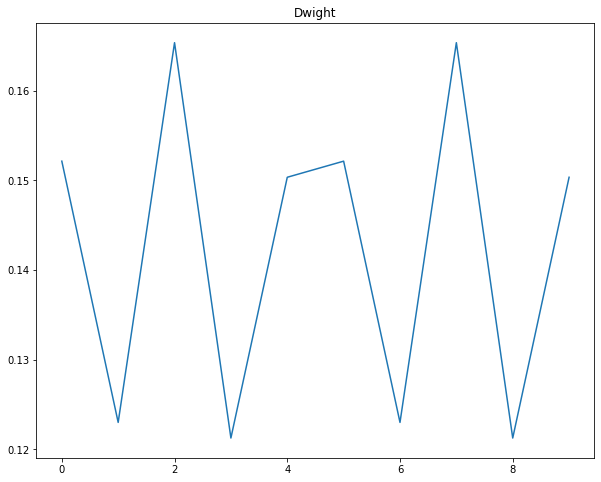

In [66]:
# Show the plot for one character
plt.plot(polarity_transcript[0])
plt.title(lines['Characters'].index[0])
plt.show()

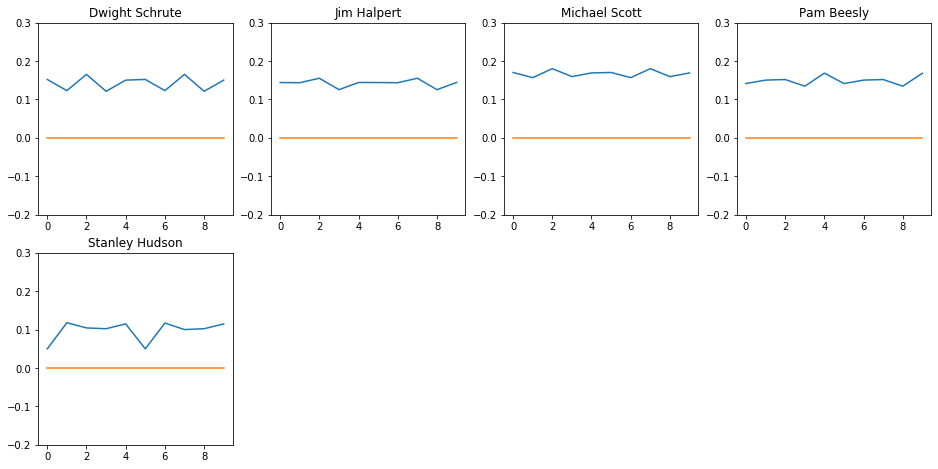

In [67]:
# Show the plot for all characters
plt.rcParams['figure.figsize'] = [16, 12]

for index, character in enumerate(lines.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(lines['Characters'][index])
    plt.ylim(ymin=-.2, top=.3)
    
plt.show()

## Topic Modeling

In [68]:
# Let's read in our document-term matrix
import pandas as pd
import pickle

data = pd.read_pickle('pickle/dtm_stop.pkl')
data

aa  aaaaaaaa  aaaaaand  aaaaah  aaaaeeexcellent  aaaagh  aaaah  \
Dwight    4        24         0       4                0       4      8   
Jim       0         0         0       0                0       0      0   
Michael   0         8         4       0                4       0      4   
Pam       0         0         0       0                0       0      0   
Stanley   0         0         0       0                0       0      0   

         aaaahh  aaaahhh  aaaall  ...  zombie  zombies  zone  zoning  zoo  \
Dwight        0        0       0  ...      12        4    12       4   12   
Jim           0        0       0  ...       8        4     4       0    0   
Michael       8        4       4  ...       0        4    44       4    4   
Pam           0        0       0  ...       0        0     0       0    0   
Stanley       0        0       0  ...       0        0     0       0    0   

         zoom  zooms  zoppity  zoran  zuckerberg  
Dwight      0      0        0      4           4  
Jim         0      0        0      0           0  
Michael    20      4        8      0           0  
Pam         0      0        0      0           0  
Stanley     0      0        0      0           0  

[5 rows x 14926 columns]

In [72]:
# Import the necessary modules for LDA with gensim
# Terminal / Anaconda Navigator: conda install -c conda-forge gensim
from gensim import matutils, models
import scipy.sparse

# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [73]:
# One of the required inputs is a term-document matrix
tdm = data.transpose()
tdm.head()

Dwight  Jim  Michael  Pam  Stanley
aa                    4    0        0    0        0
aaaaaaaa             24    0        8    0        0
aaaaaand              0    0        4    0        0
aaaaah                4    0        0    0        0
aaaaeeexcellent       0    0        4    0        0

In [74]:
# We're going to put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [75]:
# Gensim also requires dictionary of the all terms and their respective location in the term-document matrix
cv = pickle.load(open("pickle/cv_stop.pkl", "rb"))
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term), we need to specify two other parameters - the number of topics and the number of passes. Let's start the number of topics at 2, see if the results make sense, and increase the number from there.

In [76]:
# Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term),
# we need to specify two other parameters as well - the number of topics and the number of passes
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=10)
lda.print_topics()

[(0,
  '0.006*"people" + 0.006*"pam" + 0.005*"lets" + 0.005*"look" + 0.005*"little" + 0.005*"jim" + 0.005*"god" + 0.005*"great" + 0.005*"tell" + 0.004*"guys"'),
 (1,
  '0.008*"jim" + 0.005*"great" + 0.005*"pam" + 0.005*"thank" + 0.004*"mean" + 0.004*"tell" + 0.004*"look" + 0.004*"make" + 0.004*"hes" + 0.004*"sorry"')]

In [77]:
# LDA for num_topics = 3
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=3, passes=10)
lda.print_topics()

[(0,
  '0.007*"people" + 0.007*"pam" + 0.005*"lets" + 0.005*"look" + 0.005*"little" + 0.005*"god" + 0.005*"great" + 0.005*"everybody" + 0.004*"guys" + 0.004*"tell"'),
 (1,
  '0.008*"jim" + 0.007*"great" + 0.007*"mean" + 0.006*"sorry" + 0.006*"thank" + 0.005*"pam" + 0.005*"maybe" + 0.005*"didnt" + 0.005*"little" + 0.005*"tell"'),
 (2,
  '0.008*"jim" + 0.005*"pam" + 0.005*"man" + 0.004*"let" + 0.004*"lets" + 0.004*"thank" + 0.004*"look" + 0.004*"make" + 0.004*"wait" + 0.004*"way"')]

In [78]:
# LDA for num_topics = 4
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=4, passes=10)
lda.print_topics()

[(0,
  '0.009*"pam" + 0.008*"great" + 0.007*"mean" + 0.007*"sorry" + 0.006*"wow" + 0.006*"alright" + 0.006*"actually" + 0.005*"didnt" + 0.005*"sure" + 0.005*"little"'),
 (1,
  '0.011*"jim" + 0.005*"thank" + 0.004*"tell" + 0.004*"make" + 0.004*"hes" + 0.004*"great" + 0.004*"look" + 0.004*"people" + 0.004*"ill" + 0.004*"let"'),
 (2,
  '0.007*"people" + 0.007*"pam" + 0.005*"lets" + 0.005*"look" + 0.005*"little" + 0.005*"god" + 0.005*"great" + 0.005*"everybody" + 0.005*"guys" + 0.004*"tell"'),
 (3,
  '0.007*"work" + 0.005*"little" + 0.005*"day" + 0.005*"ill" + 0.004*"way" + 0.004*"years" + 0.004*"christmas" + 0.004*"mind" + 0.004*"said" + 0.003*"look"')]

### Attempt 2

These topics aren't looking too great. We've tried modifying our parameters. Let's try modifying our terms list as well.

In [104]:
# Let's create a function to pull out nouns from a string of text
#from nltk import word_tokenize, pos_tag
import nltk
def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

In [105]:
# Read in the cleaned data, before the CountVectorizer step
data_clean = pd.read_pickle('pickle/lines_clean.pkl')
data_clean

lines
Dwight    shall i play for you  pa rum pump um pum  i have no gifts for you  pa rum pump um pum whassup whassup what just clearing my desk  i cant concentr...
Jim      oh  i told you  i couldnt close it  so   actually  you called me in here  but yeah my job is to speak to clients on the phone about    uh  quantit...
Michael  all right jim  your quarterlies look very good  how are things at the library so youve come to the master for guidance  is this what youre saying ...
Pam      well  i dont know what uh  yeah  just a fax you havent told me uh  yeah  the one   you put in the garbage can that was a special filing cabinet i ...
Stanley  well   it could be out of your hands michael can you promise that its just that we need to know you cant say for sure whether itll be us or them  ...

If you get a lookup error on the: data_nouns = pd.DataFratme(lines_clean.lines.apply(nouns)) run this
import nltk
nltk.download('punkt')t
nltk.download('averaged_perceptron_tagger')

In [109]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns = pd.DataFratme(lines_clean.lines.apply(nouns))
data_nouns

lines
Dwight   play pump pum i gifts pump pum whassup desk i spilling edge word syllables demarcation safety violation i i problem i i interview i im manager i u...
Jim      oh i job clients phone quantities type paper whassup i years nothing care yes stop mr davis something minutes desk downsizing thing i information ...
Michael  jim quarterlies things library master guidance youre id office manager hello scott i manager dunder paper products manager manger deal thank sir y...
Pam      yeah fax garbage filing cabinet i question cat party sunday scott i thing i girls dream receptionist i illustrations oil pencil um jim dunder miff...
Stanley  hands itll cultures success america collard collard greens vision thanks surprise day confidentiality surprise whyd year years course whats dont m...

In [84]:
# Create a new document-term matrix using only nouns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate a document-term matrix with only nouns
cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(data_nouns.lines)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())
data_dtmn.index = data_nouns.index
data_dtmn

aaaaaaaa  aaaaah  aaaagh  aaaah  aaaahh  aaaahhh  aaaarrhh  aaagh  \
Dwight          4       1       1      1       0        0         1      1   
Jim             0       0       0      0       0        0         0      0   
Michael         0       0       0      0       1        1         0      0   
Pam             0       0       0      0       0        0         0      0   
Stanley         0       0       0      0       0        0         0      0   

         aaah  aaahhh  ...  zit  zits  zombie  zombies  zone  zoo  zoom  \
Dwight      1       0  ...    1     0       3        1     2    3     0   
Jim         0       0  ...    0     0       1        1     1    0     0   
Michael     2       1  ...    1     1       0        1     7    1     2   
Pam         0       0  ...    0     0       0        0     0    0     0   
Stanley     0       0  ...    0     0       0        0     0    0     0   

         zooms  zoppity  zuckerberg  
Dwight       0        0           1  
Jim          0        0           0  
Michael      1        2           0  
Pam          0        0           0  
Stanley      0        0           0  

[5 rows x 9377 columns]

In [85]:
# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

In [86]:
# Let's start with 2 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=2, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.001*"hey" + 0.001*"michael" + 0.001*"okay" + 0.001*"jim" + 0.001*"man" + 0.001*"lets" + 0.001*"thing" + 0.001*"office" + 0.001*"pam" + 0.001*"god"'),
 (1,
  '0.011*"hey" + 0.009*"okay" + 0.009*"jim" + 0.009*"michael" + 0.007*"thing" + 0.007*"way" + 0.007*"day" + 0.006*"man" + 0.006*"pam" + 0.006*"office"')]

In [87]:
# Let's try topics = 3
ldan = models.LdaModel(corpus=corpusn, num_topics=3, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.012*"jim" + 0.009*"michael" + 0.006*"man" + 0.006*"way" + 0.006*"hey" + 0.006*"thing" + 0.005*"office" + 0.005*"okay" + 0.005*"hes" + 0.004*"paper"'),
 (1,
  '0.013*"hey" + 0.011*"okay" + 0.008*"day" + 0.008*"michael" + 0.008*"thing" + 0.007*"jim" + 0.007*"dwight" + 0.007*"way" + 0.007*"pam" + 0.006*"office"'),
 (2,
  '0.003*"michael" + 0.003*"day" + 0.003*"years" + 0.003*"mind" + 0.003*"way" + 0.002*"damn" + 0.002*"work" + 0.002*"christmas" + 0.002*"thing" + 0.002*"jim"')]

In [88]:
# Let's try 4 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=4, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.012*"hey" + 0.011*"okay" + 0.008*"day" + 0.008*"pam" + 0.008*"thing" + 0.007*"way" + 0.007*"dwight" + 0.007*"man" + 0.007*"everybody" + 0.006*"office"'),
 (1,
  '0.014*"jim" + 0.014*"michael" + 0.010*"hey" + 0.007*"way" + 0.007*"okay" + 0.006*"thing" + 0.006*"hes" + 0.006*"office" + 0.006*"man" + 0.005*"gon"'),
 (2,
  '0.001*"hey" + 0.001*"michael" + 0.001*"way" + 0.001*"okay" + 0.001*"day" + 0.001*"thing" + 0.000*"jim" + 0.000*"man" + 0.000*"today" + 0.000*"pam"'),
 (3,
  '0.000*"hey" + 0.000*"okay" + 0.000*"thing" + 0.000*"man" + 0.000*"way" + 0.000*"michael" + 0.000*"day" + 0.000*"lets" + 0.000*"pam" + 0.000*"dwight"')]

### Attempt 3

In [90]:
# Let's create a function to pull out nouns from a string of text
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

In [92]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns_adj = pd.DataFrame(data_clean.lines.apply(nouns_adj))
data_nouns_adj

lines
Dwight   play rum pump um pum i gifts rum pump um pum whassup desk i spilling edge word syllables demarcation safety violation i organ i problem i i interv...
Jim      oh i close job clients phone uh quantities type copier paper whassup i years nothing care yes stop ridiculous sure mr davis right something minute...
Michael  right jim quarterlies good things library master guidance youre grasshopper id office manager hello michael scott i regional manager dunder paper ...
Pam      i uh yeah fax uh garbage special filing cabinet i important question cat party sunday mr scott i worst thing i dont many little girls dream recept...
Stanley  hands cant sure itll i cultures success america collard collard greens dental vision deductible light green green oh thanks big surprise pretty ho...

In [93]:
# Create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
cvna = CountVectorizer(stop_words=stop_words, max_df=.8)
data_cvna = cvna.fit_transform(data_nouns_adj.lines)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data_nouns_adj.index
data_dtmna

aaaaaaaa  aaaaah  aaaaeeexcellent  aaaagh  aaaah  aaaahh  aaaahhh  \
Dwight          4       1                0       1      1       0        0   
Jim             0       0                0       0      0       0        0   
Michael         0       0                1       0      1       1        1   
Pam             0       0                0       0      0       0        0   
Stanley         0       0                0       0      0       0        0   

         aaaarrhh  aaagh  aaah  ...  zit  zits  zombie  zombies  zone  zoo  \
Dwight          1      2     2  ...    1     0       3        1     2    3   
Jim             0      0     1  ...    0     0       2        1     1    0   
Michael         0      0     3  ...    1     1       0        1     7    1   
Pam             0      0     0  ...    0     0       0        0     0    0   
Stanley         0      0     0  ...    0     0       0        0     0    0   

         zoom  zooms  zoppity  zuckerberg  
Dwight      0      0        0           1  
Jim         0      0        0           0  
Michael     2      1        2           0  
Pam         0      0        0           0  
Stanley     0      0        0           0  

[5 rows x 11189 columns]

In [94]:
# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [95]:
# Let's start with 2 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=2, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.006*"schrute" + 0.002*"dunder" + 0.002*"place" + 0.002*"mifflin" + 0.002*"angela" + 0.002*"assistant" + 0.002*"farm" + 0.002*"regional" + 0.002*"id" + 0.002*"salesman"'),
 (1,
  '0.007*"wow" + 0.006*"alright" + 0.004*"place" + 0.004*"mifflin" + 0.004*"dunder" + 0.003*"cool" + 0.003*"point" + 0.003*"scott" + 0.003*"oscar" + 0.003*"scranton"')]

In [96]:
# Let's try 3 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=3, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.006*"alright" + 0.006*"wow" + 0.005*"place" + 0.004*"dunder" + 0.004*"mifflin" + 0.004*"scott" + 0.003*"oscar" + 0.003*"point" + 0.003*"cool" + 0.003*"david"'),
 (1,
  '0.008*"wow" + 0.005*"alright" + 0.004*"mom" + 0.004*"mifflin" + 0.004*"cool" + 0.003*"dunder" + 0.003*"whoa" + 0.003*"place" + 0.003*"cece" + 0.003*"roy"'),
 (2,
  '0.006*"schrute" + 0.003*"dunder" + 0.002*"place" + 0.002*"mifflin" + 0.002*"angela" + 0.002*"assistant" + 0.002*"farm" + 0.002*"regional" + 0.002*"id" + 0.002*"salesman"')]

In [97]:
# Let's try 4 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.007*"schrute" + 0.003*"dunder" + 0.003*"place" + 0.003*"mifflin" + 0.002*"angela" + 0.002*"assistant" + 0.002*"farm" + 0.002*"regional" + 0.002*"id" + 0.002*"salesman"'),
 (1,
  '0.009*"wow" + 0.008*"alright" + 0.005*"whoa" + 0.003*"cool" + 0.003*"deal" + 0.003*"assistant" + 0.003*"wimowheh" + 0.003*"ll" + 0.003*"place" + 0.002*"quick"'),
 (2,
  '0.006*"wow" + 0.005*"alright" + 0.005*"mifflin" + 0.004*"place" + 0.004*"dunder" + 0.003*"cool" + 0.003*"scott" + 0.003*"oscar" + 0.003*"point" + 0.003*"scranton"'),
 (3,
  '0.000*"wow" + 0.000*"schrute" + 0.000*"alright" + 0.000*"place" + 0.000*"mifflin" + 0.000*"assistant" + 0.000*"whoa" + 0.000*"point" + 0.000*"cool" + 0.000*"id"')]

## Identify Topics in Each Document

Out of the 9 topic models we looked at, the nouns and adjectives, 4 topic one made the most sense. So let's pull that down here and run it through some more iterations to get more fine-tuned topics.

In [98]:
# Our final LDA model (for now)
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=80)
ldana.print_topics()

[(0,
  '0.007*"wow" + 0.007*"alright" + 0.005*"place" + 0.003*"dunder" + 0.003*"cool" + 0.003*"mifflin" + 0.003*"scott" + 0.003*"point" + 0.003*"whoa" + 0.003*"oscar"'),
 (1,
  '0.000*"schrute" + 0.000*"dunder" + 0.000*"wow" + 0.000*"mifflin" + 0.000*"place" + 0.000*"alright" + 0.000*"different" + 0.000*"angela" + 0.000*"oscar" + 0.000*"david"'),
 (2,
  '0.002*"heh" + 0.002*"hudson" + 0.002*"clients" + 0.001*"pretzel" + 0.001*"ve" + 0.001*"corn" + 0.001*"melissa" + 0.001*"purchase" + 0.001*"easier" + 0.001*"holiday"'),
 (3,
  '0.005*"schrute" + 0.004*"mifflin" + 0.004*"dunder" + 0.003*"angela" + 0.003*"place" + 0.003*"wow" + 0.002*"id" + 0.002*"cool" + 0.002*"oscar" + 0.002*"scranton"')]

These topics look shit... We need to try and get some better ones.

In [99]:
# Let's take a look at which topics each transcript contains
corpus_transformed = ldana[corpusna]
list(zip([a for [(a,b)] in corpus_transformed], data_dtmna.index))

ValueError: too many values to unpack (expected 1)